Data Exploration (Tom, Timo, Adrien)

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("compas-scores-two-years.csv")
data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [75]:
data.isnull().sum().sort_values(ascending=False)

violent_recid              7214
vr_charge_degree           6395
vr_case_number             6395
vr_offense_date            6395
vr_charge_desc             6395
c_arrest_date              6077
r_jail_out                 4898
r_jail_in                  4898
r_days_from_arrest         4898
r_charge_desc              3801
r_offense_date             3743
r_case_number              3743
r_charge_degree            3743
c_offense_date             1159
c_jail_out                  307
days_b_screening_arrest     307
c_jail_in                   307
out_custody                 236
in_custody                  236
c_charge_desc                29
c_days_from_compas           22
c_case_number                22
v_type_of_assessment          0
type_of_assessment            0
decile_score.1                0
v_decile_score                0
v_score_text                  0
v_screening_date              0
screening_date                0
priors_count.1                0
start                         0
end     

<Axes: >

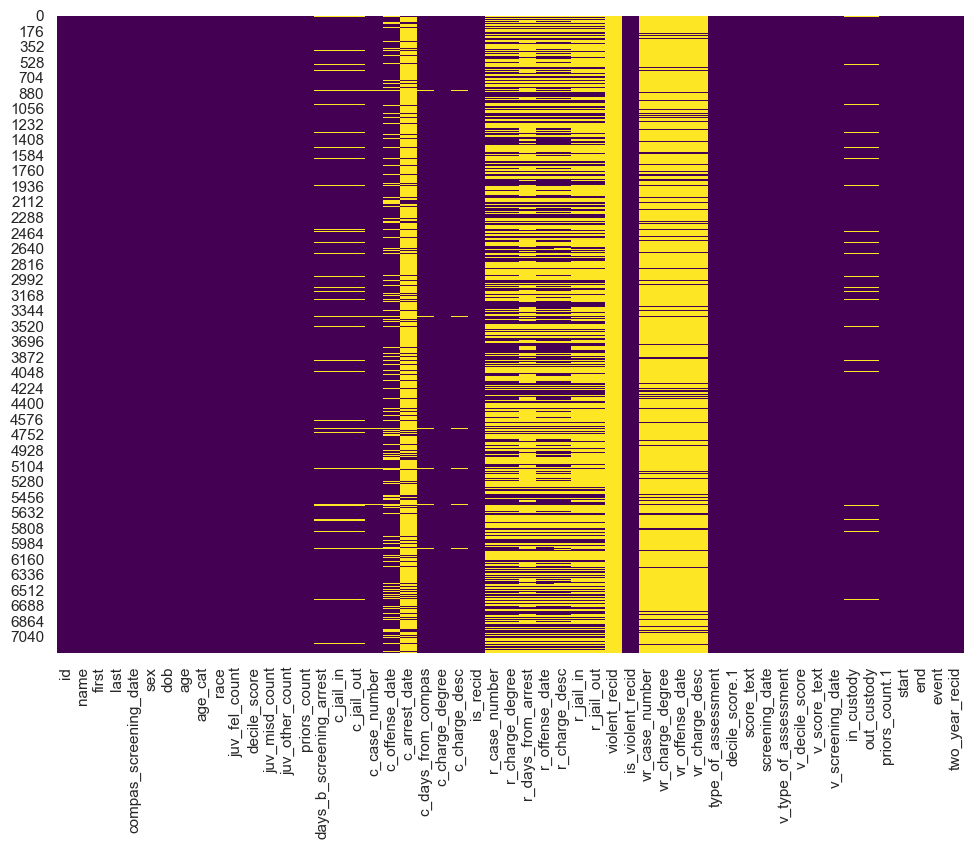

In [76]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # This adjusts the size of the plots, its optional to make your plots look more interesting.
sns.heatmap(data.isnull(), cbar=False,cmap = 'viridis')

In [77]:
data = data[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count', 
               'days_b_screening_arrest', 'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']]

data = data[(data['days_b_screening_arrest'] <= 30) & (data['days_b_screening_arrest'] >= -30) &
            (data['is_recid'] != -1) & (data['c_charge_degree'] != 'O') & (data['score_text'] != 'N/A')]
data.shape

(6172, 13)

In [78]:
#TODO: Higher COMPAS scores are slightly correlated with a longer length of stay. Show and look at other correlations

In [79]:
# df$length_of_stay <- as.numeric(as.Date(df$c_jail_out) - as.Date(df$c_jail_in))
# cor(df$length_of_stay, df$decile_score)

In [80]:
print(data['age_cat'].value_counts())

age_cat
25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: count, dtype: int64


In [81]:
print(data['race'].value_counts())

race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64


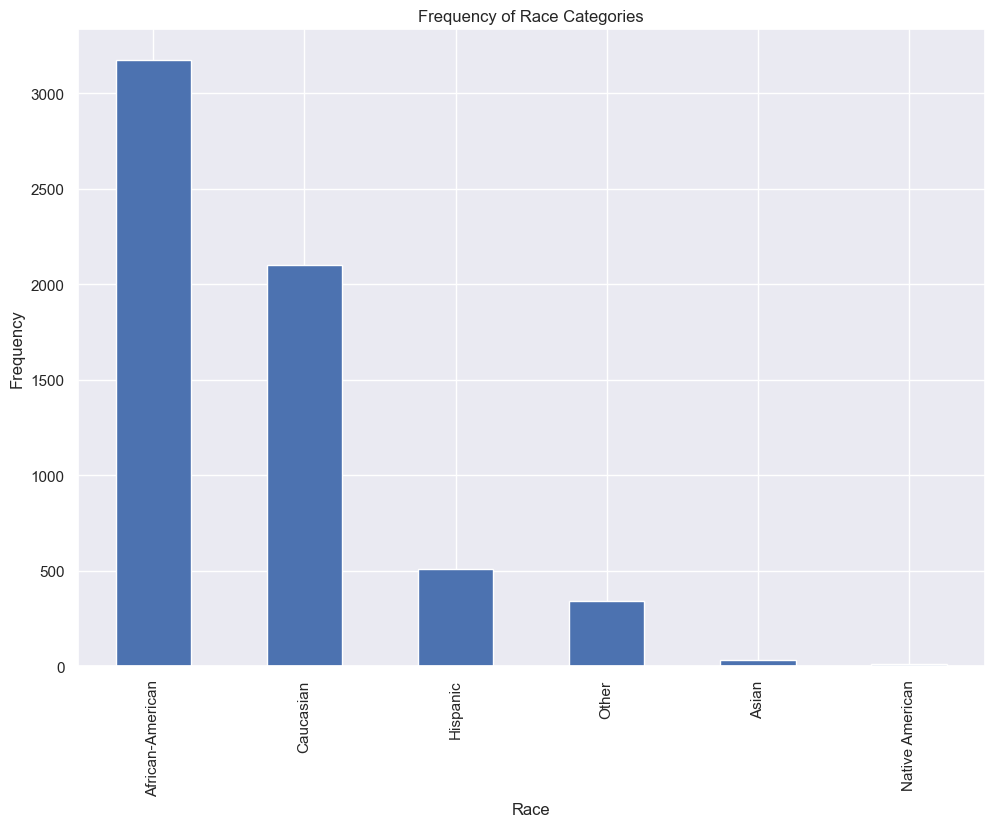

In [82]:
data['race'].value_counts().plot(kind='bar')
plt.title('Frequency of Race Categories')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

In [83]:
print(data['score_text'].value_counts())

score_text
Low       3421
Medium    1607
High      1144
Name: count, dtype: int64


In [84]:
cross_tab = pd.crosstab(data['race'], data['sex'])
print(cross_tab)

sex               Female  Male
race                          
African-American     549  2626
Asian                  2    29
Caucasian            482  1621
Hispanic              82   427
Native American        2     9
Other                 58   285


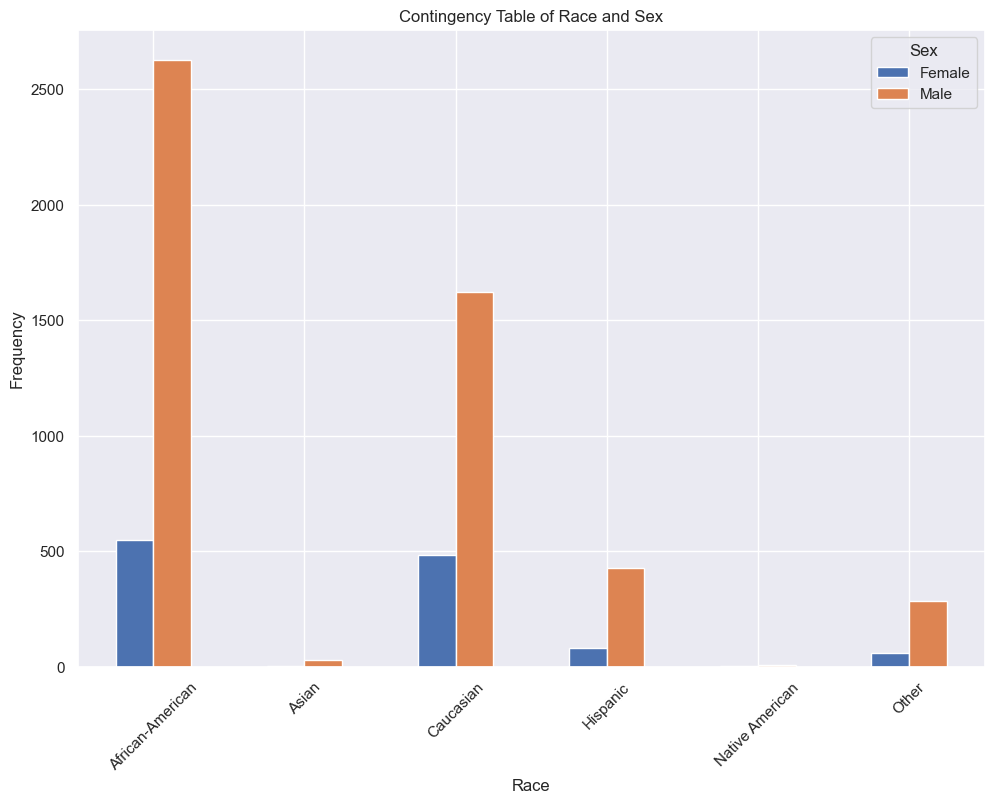

In [85]:
cross_tab.plot(kind='bar')
plt.title('Contingency Table of Race and Sex')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Sex')
plt.show()

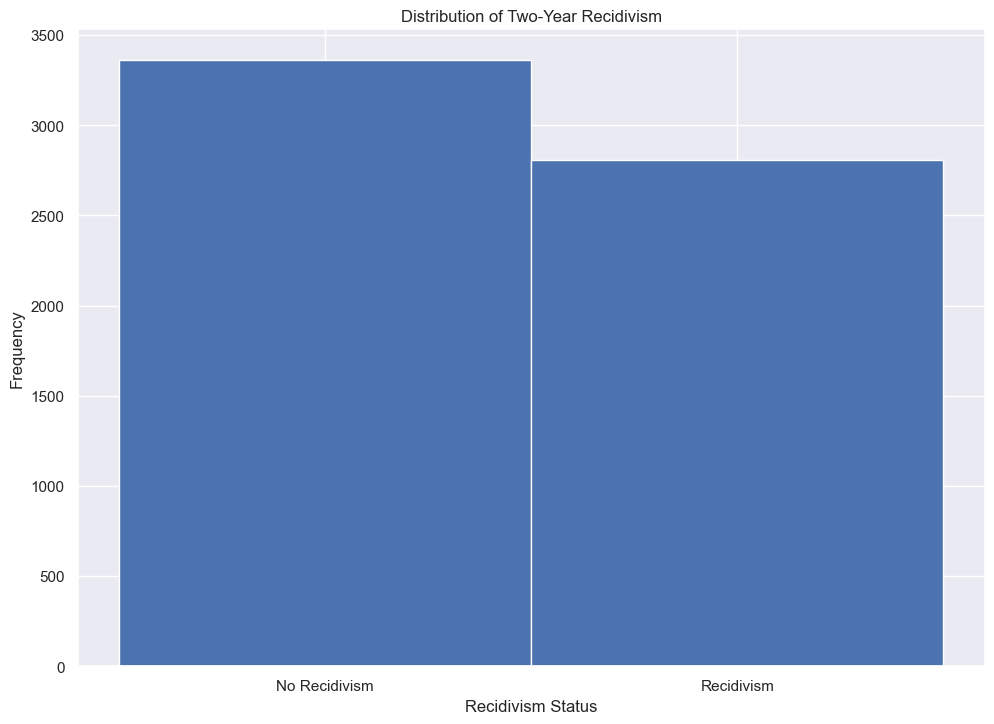

In [86]:
plt.hist(data['two_year_recid'], bins=2)
plt.title('Distribution of Two-Year Recidivism')
plt.xlabel('Recidivism Status')
plt.ylabel('Frequency')
plt.xticks([0.25, 0.75], ['No Recidivism', 'Recidivism'])
plt.show()

In [87]:
cross_tab = pd.crosstab(data['race'], data['two_year_recid'])
print(cross_tab)

two_year_recid       0     1
race                        
African-American  1514  1661
Asian               23     8
Caucasian         1281   822
Hispanic           320   189
Native American      6     5
Other              219   124


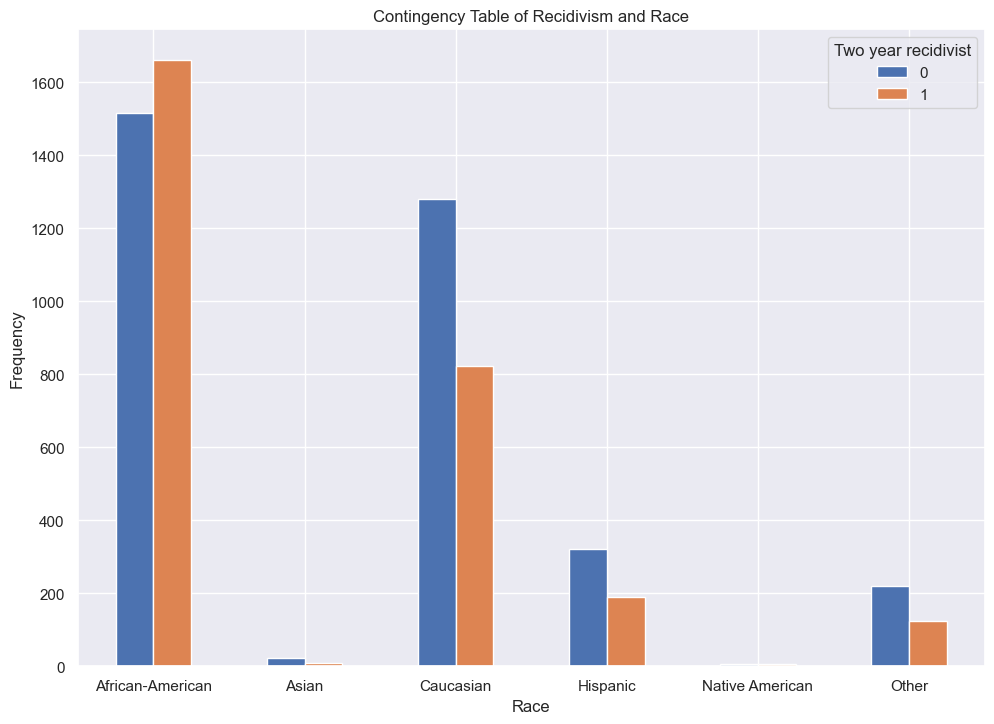

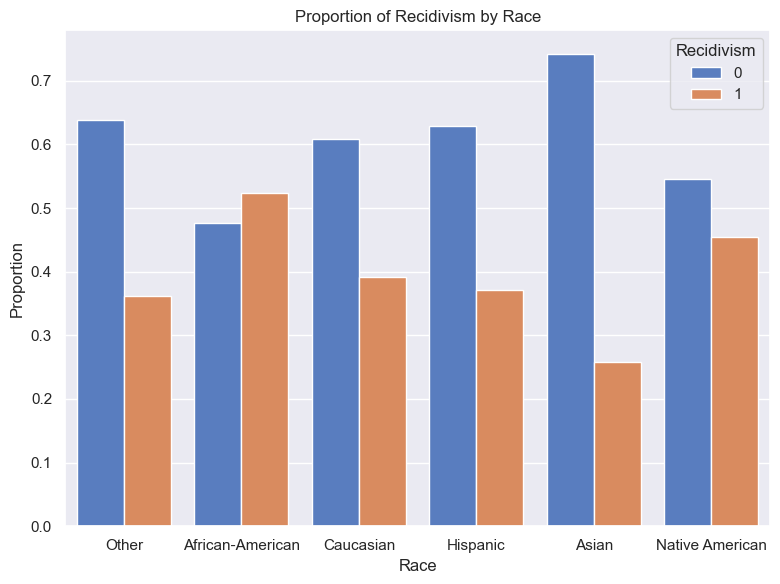

In [88]:
cross_tab.plot(kind='bar')
plt.title('Contingency Table of Recidivism and Race')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Two year recidivist')
plt.show()

# Calculate the proportions of each score category for each race
proportions = data.groupby('race')['two_year_recid'].value_counts(normalize=True).reset_index(name='proportion')

# Plotting the proportions
plt.figure(figsize=(8, 6))
sns.barplot(data=proportions, x='race', y='proportion', hue='two_year_recid', order=data['race'].unique(), palette='muted')
plt.title('Proportion of Recidivism by Race')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.legend(title='Recidivism')
plt.tight_layout()
plt.show()

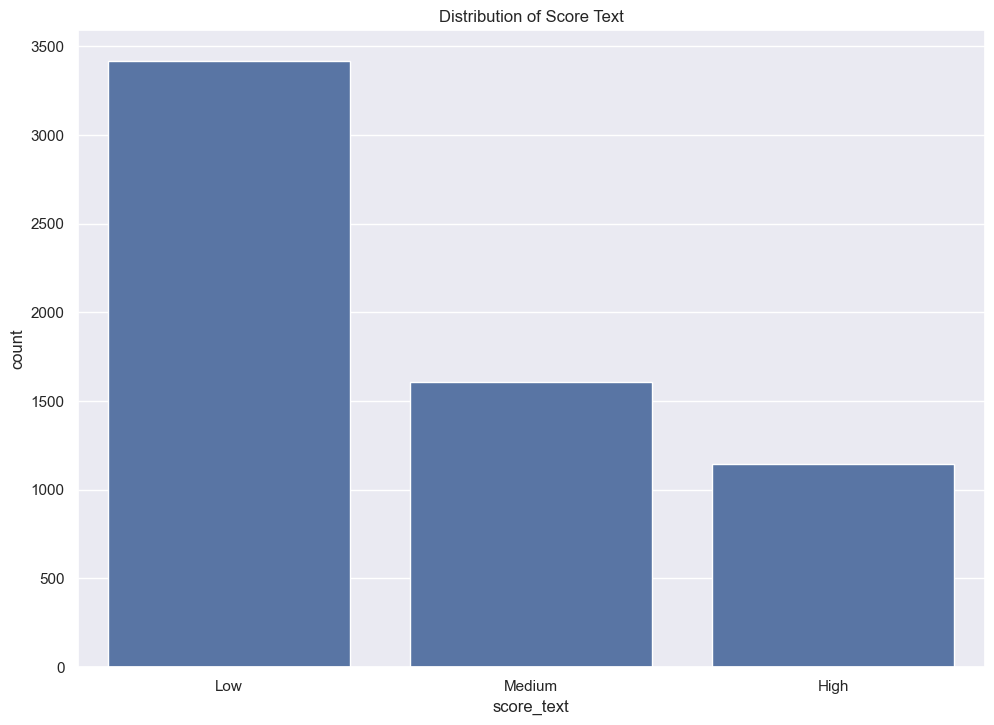

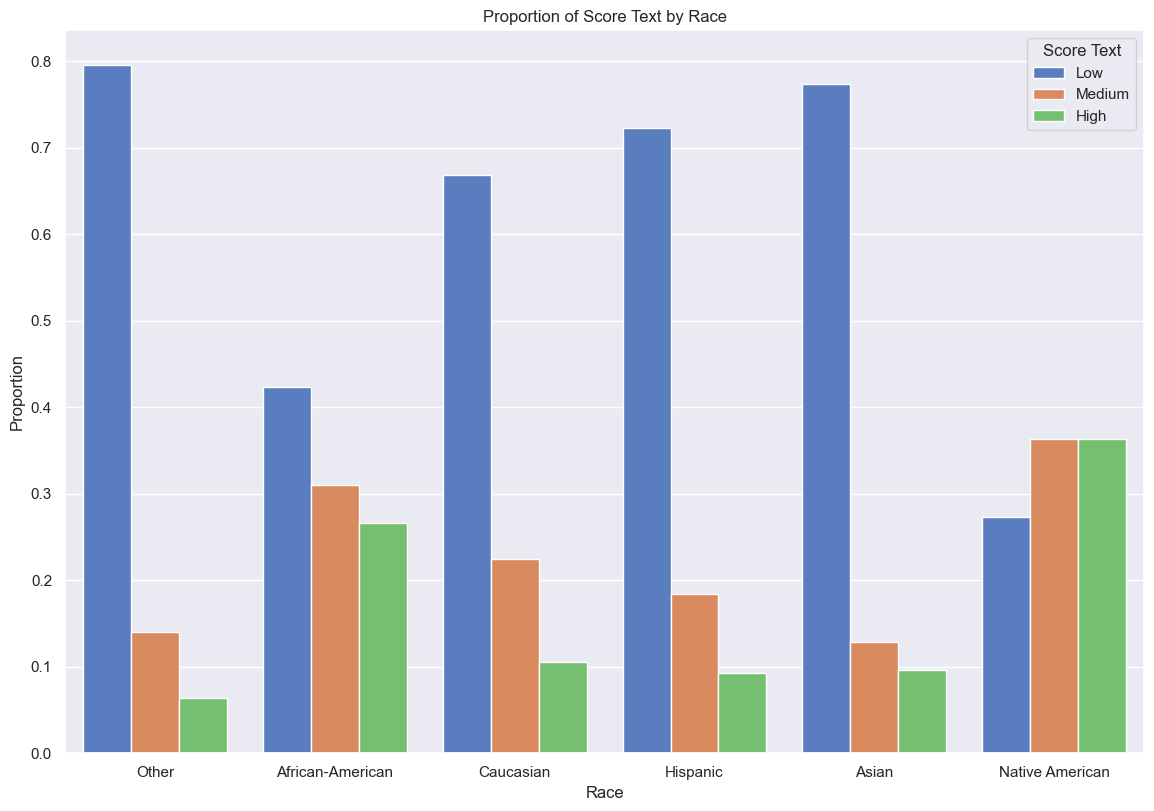

In [89]:
sns.countplot(data=data, x='score_text', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Score Text')
plt.show()

# Calculate the proportions of each score category for each race
proportions = data.groupby('race')['score_text'].value_counts(normalize=True).reset_index(name='proportion')

# Plotting the proportions
sns.barplot(data=proportions, x='race', y='proportion', hue='score_text', order=data['race'].unique(), palette='muted')
plt.title('Proportion of Score Text by Race')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.legend(title='Score Text')
plt.tight_layout()
plt.show()

In [90]:
#Todo: observe stats for misclassified

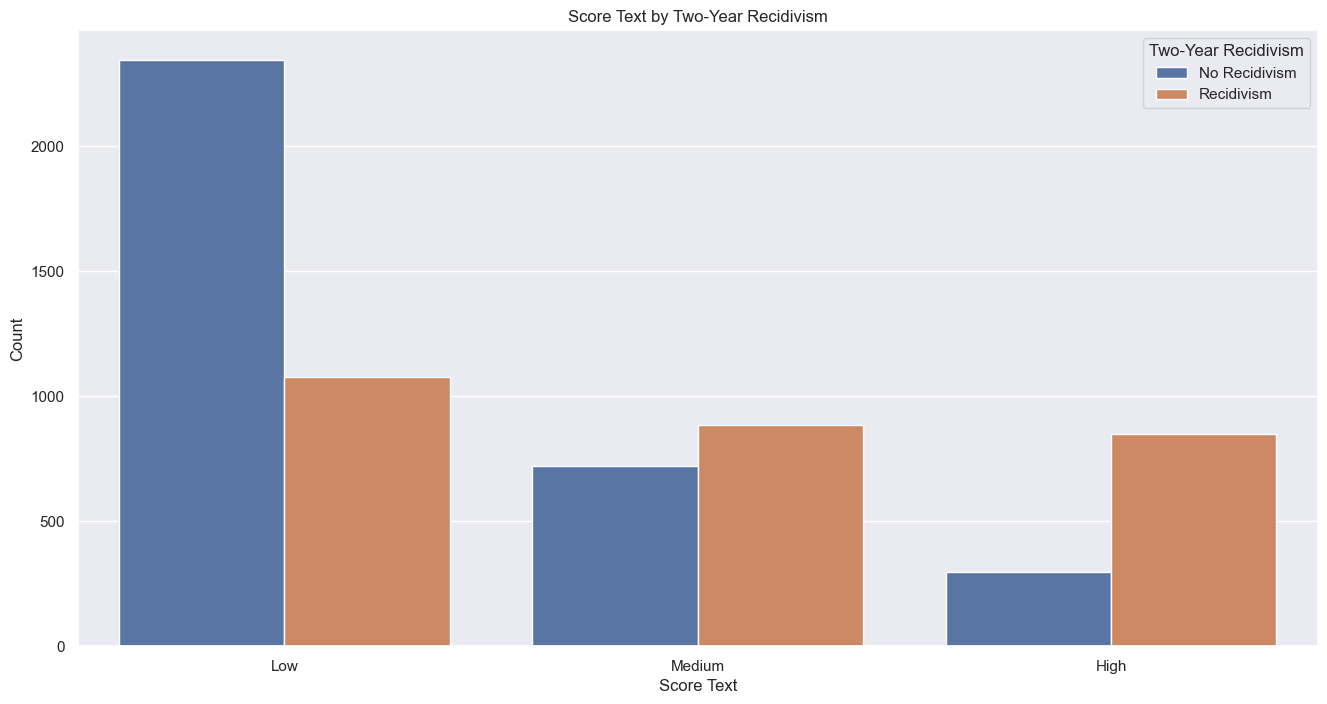

In [96]:
sns.countplot(data=data, x='score_text', hue='two_year_recid', order=['Low', 'Medium', 'High'])
plt.title('Score Text by Two-Year Recidivism')
plt.xlabel('Score Text')
plt.ylabel('Count')
plt.legend(title='Two-Year Recidivism', labels=['No Recidivism', 'Recidivism'])
plt.show()

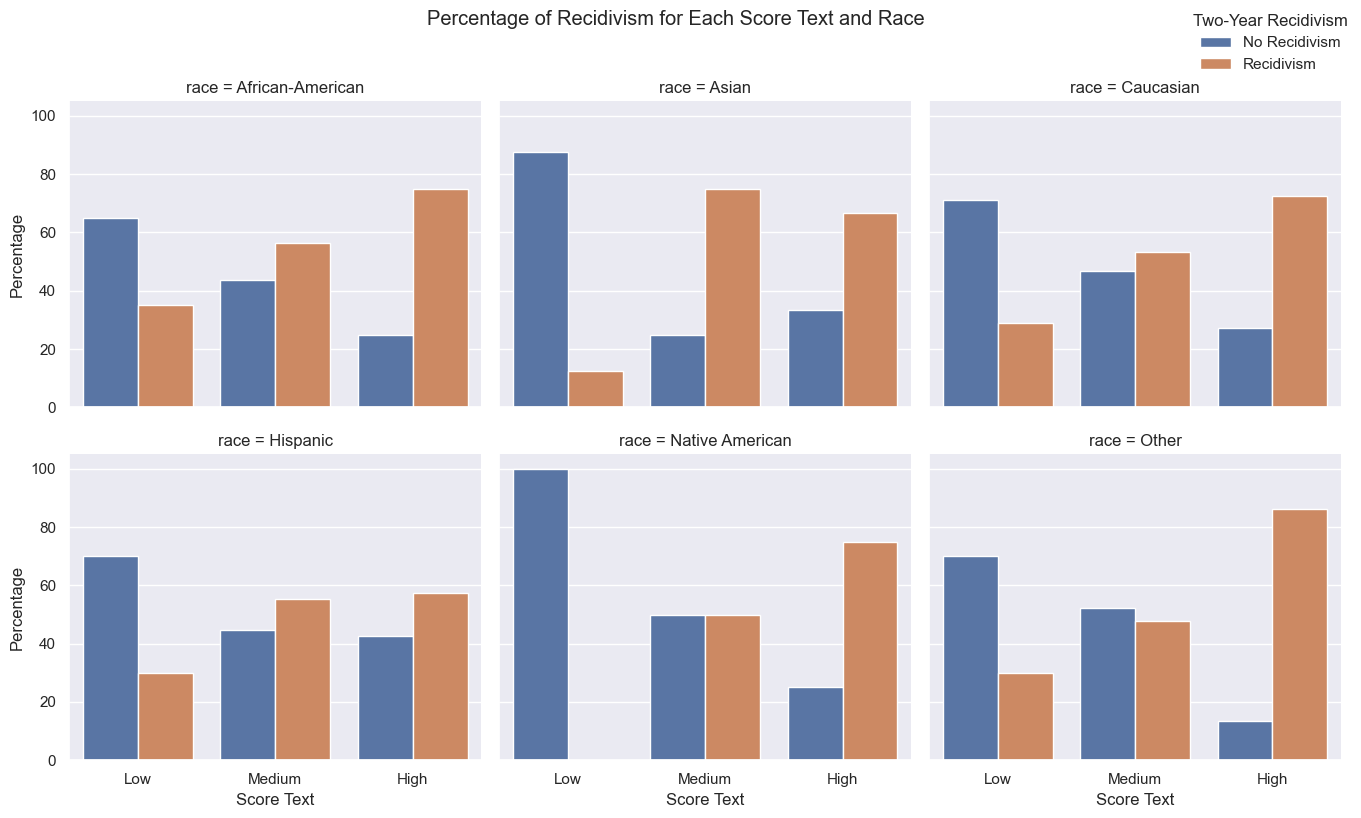

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by race and score_text
grouped = data.groupby(['race', 'score_text'])

# Calculate the percentage of recidivism or not for each score_text within each race
results = grouped['two_year_recid'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Define colors for the bars
palette = {0: sns.color_palette()[0], 1: sns.color_palette()[1]}

# Plotting score_text by recidivism for each race separately using FacetGrid
g = sns.FacetGrid(results, col="race", col_wrap=3, height=4)
g.map_dataframe(sns.barplot, x="score_text", y="percentage", hue="two_year_recid", palette=palette, order=['Low', 'Medium', 'High'], hue_order=[0, 1])
g.set_axis_labels("Score Text", "Percentage")

# Adjust legend position
g.add_legend(legend_data={
    key: value for key, value in zip(['No Recidivism', 'Recidivism'], g._legend_data.values())
},title='Two-Year Recidivism', loc='upper right', )

# Set title
plt.suptitle('Percentage of Recidivism for Each Score Text and Race', y=1.02)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64


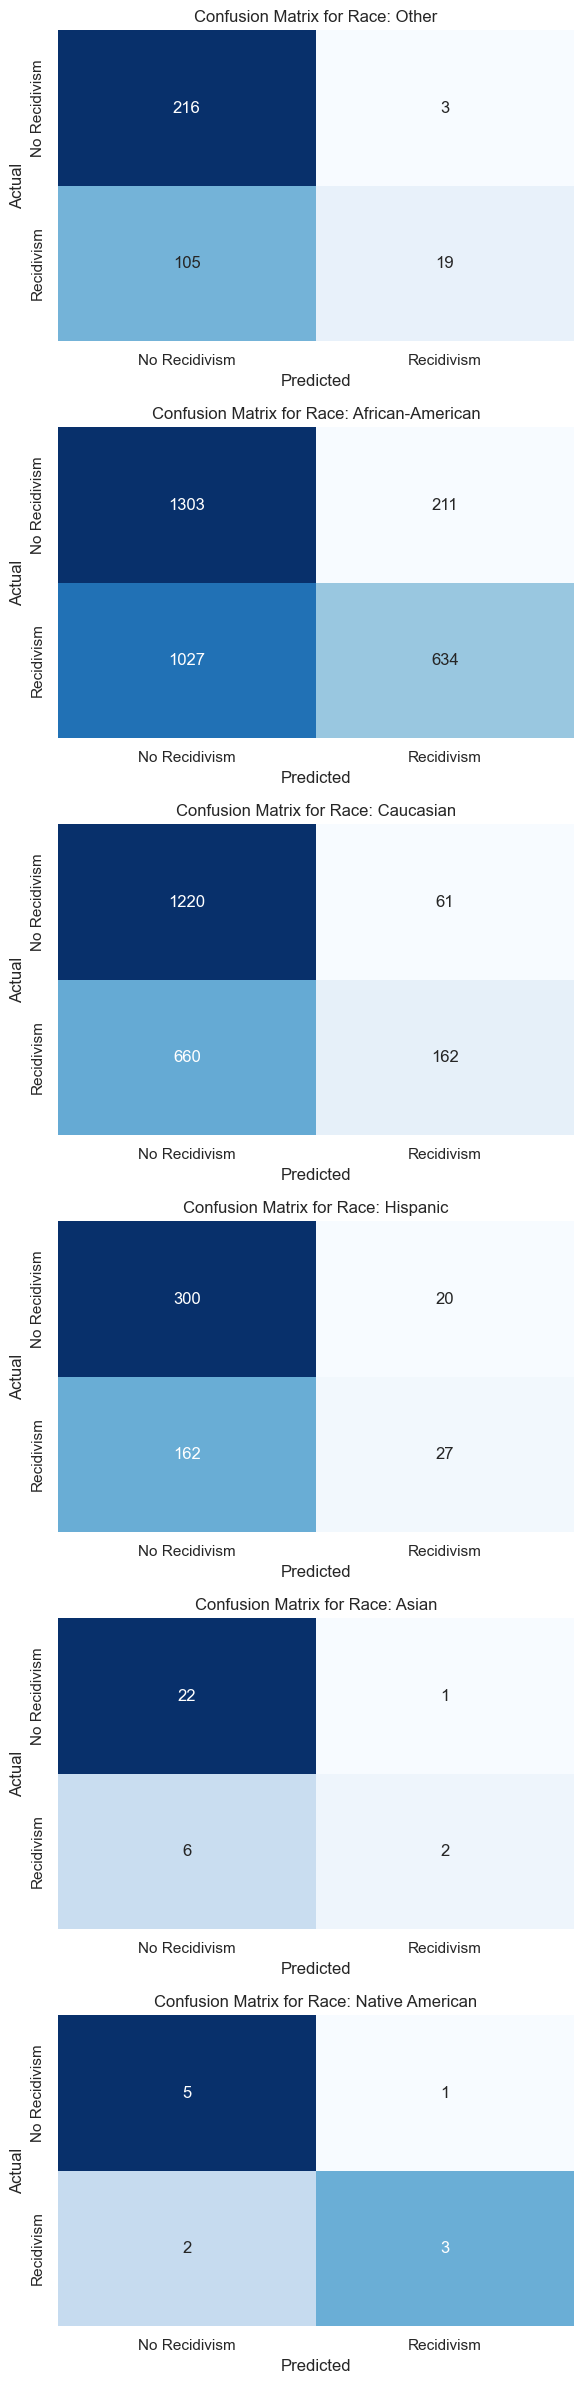

In [133]:
from sklearn.metrics import confusion_matrix

print(data['race'].value_counts())

# Define races
races = data['race'].unique()

# Create subplots
fig, axes = plt.subplots(len(races), 1, figsize=(6, len(races)*4))

# Iterate over races
for i, race in enumerate(races):
    # Filter dataframe for the current race and 'High' score_text
    filtered_df = data[(data['race'] == race)]
    
    # Calculate confusion matrix
    cm = confusion_matrix(filtered_df['two_year_recid'], filtered_df['score_text'] == 'High', labels=[False, True])
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix for Race: {race}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['No Recidivism', 'Recidivism'])
    axes[i].set_yticklabels(['No Recidivism', 'Recidivism'])

plt.tight_layout()
plt.show()

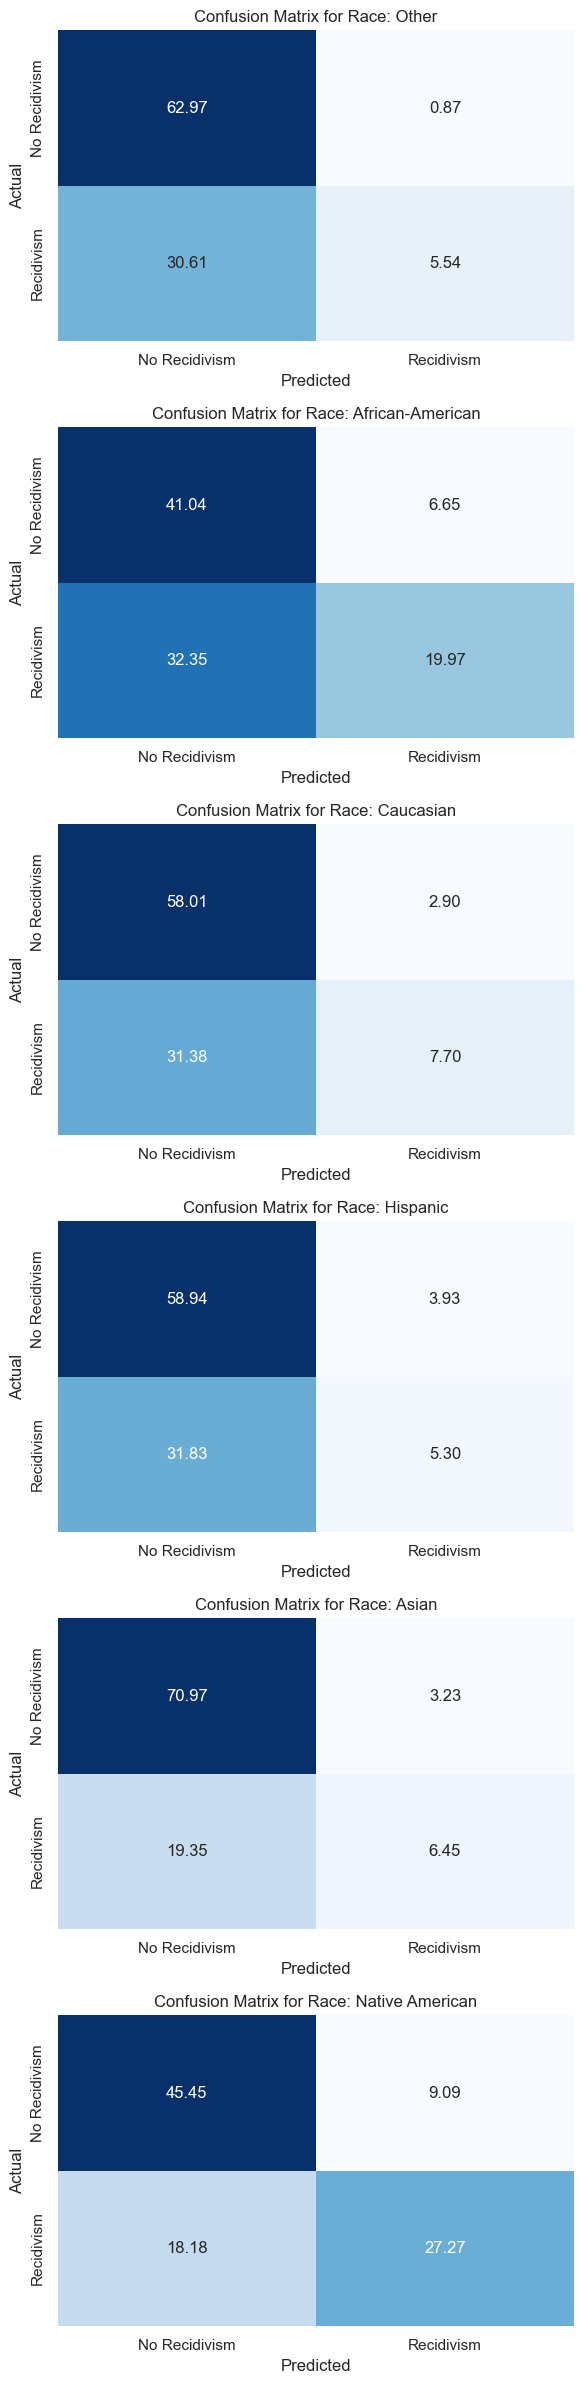

In [135]:
# Define races
races = data['race'].unique()

# Create subplots
fig, axes = plt.subplots(len(races), 1, figsize=(6, len(races)*4))

# Iterate over races
for i, race in enumerate(races):
    # Filter dataframe for the current race and 'High' score_text
    filtered_df = data[(data['race'] == race)]
    
    # Count total number of instances for the current race
    total_instances = len(filtered_df)
    
    # Calculate confusion matrix
    cm = confusion_matrix(filtered_df['two_year_recid'], filtered_df['score_text'] == 'High', labels=[False, True])
    
    # Calculate percentages over the total
    cm_percentage = cm / total_instances * 100
    
    # Plot confusion matrix
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix for Race: {race}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['No Recidivism', 'Recidivism'])
    axes[i].set_yticklabels(['No Recidivism', 'Recidivism'])

plt.tight_layout()
plt.show()


Tom:

In [91]:
non_categorical_features = data.select_dtypes(exclude=['object']).columns
correlation_matrix = data[non_categorical_features].corr()
correlation_matrix

,age,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid
age,1.000000,0.119773,-0.068926,-0.403709,-0.194802,-0.189180
priors_count,0.119773,1.000000,0.021350,0.447830,0.294522,0.290607
days_b_screening_arrest,-0.068926,0.021350,1.000000,0.085236,0.072146,0.074836
decile_score,-0.403709,0.447830,0.085236,1.000000,0.367186,0.365487
is_recid,-0.194802,0.294522,0.072146,0.367186,1.000000,0.942816
two_year_recid,-0.189180,0.290607,0.074836,0.365487,0.942816,1.000000


<Axes: >

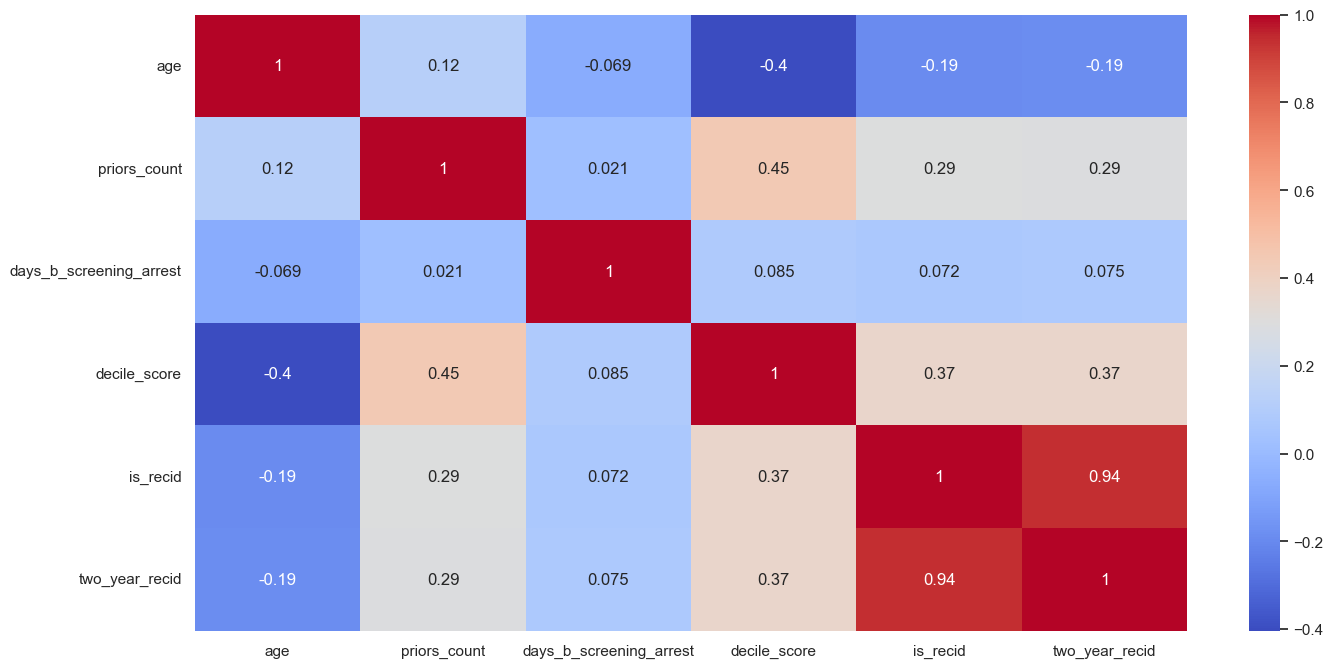

In [92]:

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlation_matrix, annot = True, fmt='.2g',cmap= 'coolwarm')

In [93]:
threshold = 0.7  # Set the correlation threshold

# Find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated pair: {pair}")
    

Highly correlated pair: ('is_recid', 'two_year_recid')


In [94]:
data.shape


(6172, 13)

Model Creation (Tanim)

XAI - SHAP (Daniel)

XAI - 2nd method